In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
image = cv2.imread("image.jpg", cv2.IMREAD_GRAYSCALE)

(np.float64(-0.5), np.float64(274.5), np.float64(182.5), np.float64(-0.5))

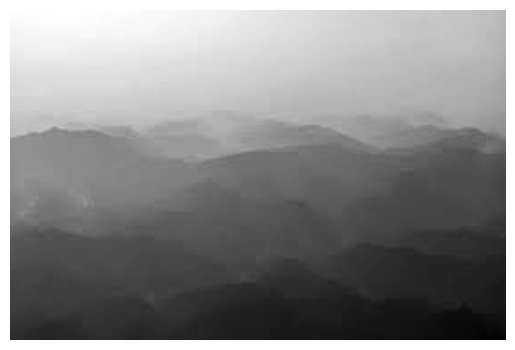

In [3]:
plt.imshow(image, cmap='gray')
plt.axis('off')

In [4]:
s_min = 0
s_max = 255
r_min = np.min(image)
r_max = np.max(image)

In [5]:
def histogram_map(img):
  height = img.shape[0]
  width = img.shape[1]
  img_hist = list(range(0, 256))
  r = []
  for i in range(height):
    for j in range(width):
      img_hist[img[i, j]]+=1

  return (img_hist)

Text(0.5, 1.0, 'Histogram of the original image')

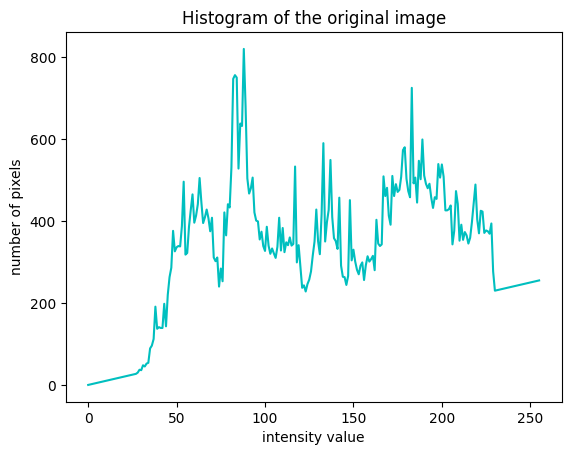

In [6]:
plt.plot(histogram_map(image), color='c')
plt.xlabel('intensity value')
plt.ylabel('number of pixels')
plt.title('Histogram of the original image')

In [7]:
def hist_equal(image):
  img = image.copy()
  feq_list = histogram_map(img)
  height = img.shape[0]
  width = img.shape[1]
  probability = []
  for i in range(0, 256):
    probability.append(feq_list[i]/np.sum(feq_list))

  cum_probability = []
  cum_probability.append(probability[0])
  for i in range(1, 256):
    cum_probability.append(cum_probability[i-1]+probability[i])

  for i in range(0, 256):
    cum_probability[i] = int(cum_probability[i]*s_max)

  for i in range(height):
    for j in range(width):
      img[i, j] = cum_probability[img[i, j]]

  return img

In [8]:
new_img = hist_equal(image)

(np.float64(-0.5), np.float64(274.5), np.float64(182.5), np.float64(-0.5))

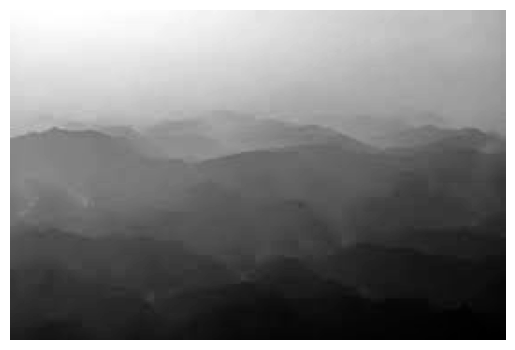

In [9]:
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.imshow(new_img, cmap='gray')
plt.axis('off')

Text(0.5, 1.0, 'Histogram of the equalized image')

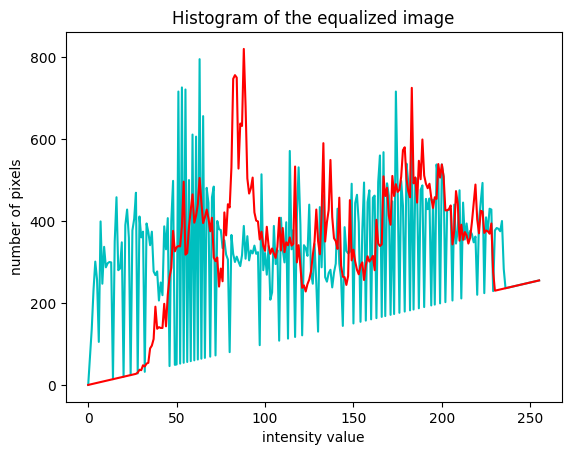

In [10]:
plt.plot(histogram_map(new_img), color='c')
plt.plot(histogram_map(image), color='r')
plt.xlabel('intensity value')
plt.ylabel('number of pixels')
plt.title('Histogram of the equalized image')